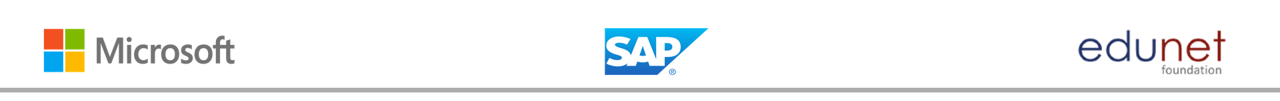

!pip install tensorflow - 2.2

In [1]:
# import libraries 

import numpy as np 
import pandas as pd 

import tensorflow as tf

In [2]:
# importing dataset 

dataset = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
dataset.shape

(10000, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#checking for missing values
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

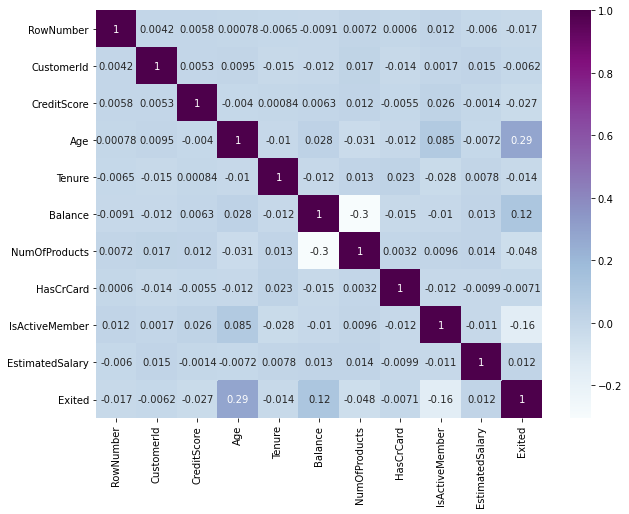

In [11]:
import matplotlib.pyplot as plt  
import seaborn as sns
#finding correlation between the features
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu') 
plt.show()

In [12]:
X = dataset.iloc[:, 3:-1].values

In [13]:
#target value 
y = dataset.iloc[:, -1].values

In [14]:
#as we have two columns as categorical terms we go for encoding we need to convert to numericals
#Categorical encoding
#gender will have some correlation with other feature so we go for label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

#gender column in index 2
X[:, 2] = le.fit_transform(X[:, 2])

In [15]:
#country name wont be that much correlation added it has more than 2 names so go for one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#country name is present in 1st index value
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
#training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
#feature scaling is an important and mandatory for ann process before modelling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#ANN - initializing   

ann = tf.keras.models.Sequential()



In [19]:
#input layer
# 6 features
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [20]:
#hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [21]:
#output layer
#as target value is binary - AF
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
#compiling
#loss - target is binary 
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
#training set
ann.fit(X_train, y_train, batch_size = 8, epochs = 10)

Epoch 1/10
875/875 [==============================] - 3s 1ms/step - loss: 0.5040 - accuracy: 0.7914: 0s - loss: 0 - ETA: 0s - loss: 0.5098 - accuracy: 0.
Epoch 2/10
875/875 [==============================] - 2s 2ms/step - loss: 0.4315 - accuracy: 0.8070
Epoch 3/10
875/875 [==============================] - 1s 1ms/step - loss: 0.4107 - accuracy: 0.8223
Epoch 4/10
875/875 [==============================] - 1s 1ms/step - loss: 0.3896 - accuracy: 0.8374
Epoch 5/10
875/875 [==============================] - 1s 1ms/step - loss: 0.3726 - accuracy: 0.8454: 0s - loss: 0.3710 - accuracy: 
Epoch 6/10
875/875 [==============================] - 1s 1ms/step - loss: 0.3627 - accuracy: 0.8470
Epoch 7/10
875/875 [==============================] - 1s 1ms/step - loss: 0.3589 - accuracy: 0.8477
Epoch 8/10
875/875 [==============================] - 1s 1ms/step - loss: 0.3553 - accuracy: 0.8497
Epoch 9/10
875/875 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 0.8530
Epoch 10/10
87

In [24]:
#test result - prediction  
y_pred = ann.predict(X_test)

In [25]:
#insted of values we ll get 0 or 1
y_pred = (y_pred > 0.5)
#actual vs prediicted outputs
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [26]:
#accuracy and confusion matrix  

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[2234  145]
 [ 303  318]]


0.8506666666666667